# Algoritme Primary objective




In [95]:
# General libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# specific libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
#Import data 

!git clone https://github.com/BrianvanWinden/SSc-ILD.git


Cloning into 'SSc-ILD'...


In [35]:
data = pd.read_excel("Database_postcovid_0106_zonderptnr.xlsx", )
# print (data.shape)
print (data.keys())


Index(['Study_ID', 'Patient_ID', 'Category', 'Sex', 'Date_of_birth', 'Length',
       'Weight', 'BMI', 'Smoking', 'Asthma', 'COPD', 'Lungfibrosis',
       'Pulmonary_Embolism', 'Diabetes_Mellitus', 'Hypertension',
       'LF_6w_FEV1 _abs', 'LF_6w_FEV1_pred', 'LF_6w_FVC_abs', 'LF_6w_FVC_pred',
       'LF_6w_Tiff_abs', 'LF_6w_Tiff_pred', 'LF_6w_DLCOc_abs',
       'LF_6w_DLCOc_pred', 'LF_6w_DLCO_abs', 'LF_6w_DLCO_pred', 'eN_6w',
       'eN_ID_6w', 'eN_6w_S1', 'eN_6w_S3', 'eN_6w_S4', 'eN_6w_S5', 'eN_6w_S6',
       'eN_6w_S7', 'eN_6w_S1BH', 'eN_6w_S2BH', 'eN_6w_S3BH', 'eN_6w_S4BH',
       'eN_6w_S5BH', 'eN_6w_S6BH', 'eN_6w_S7BH', 'LF_12w_FEV1_abs',
       'LF_12w_FEV1_pred', 'LF_12w_FVC_abs', 'LF_12w_FVC_pred',
       'LF_12w_Tiff_abs', 'LF_12w_Tiff_pred', 'LF_12w_DLCOc_abs',
       'LF_12w_DLCOc_pred', 'LF_12w_DLCO_abs', 'LF_12w_DLCO_pred', 'CT_12w',
       'eN_12w', 'eN_ID_12w2', 'eN_12w_S1', 'eN_12w_S3', 'eN_12w_S4',
       'eN_12w_S5', 'eN_12w_S6', 'eN_12w_S7', 'eN_12w_S1BH', 'eN_12w_S2

In [83]:

### Selecteren patienten met een 12 weekse meting.  
eN12w = data.loc[(data.eN_12w == 1) & (data.COPD != 1) & (data.Asthma != 1) & (data.Lungfibrosis != 1) & (data.Pulmonary_Embolism != 1)]

### Selecteren van data gemaakt door de eNose sensoren (met en zonder Labels). 
eNose = eN12w.loc[:,['eN_12w_S1', 'eN_12w_S3', 'eN_12w_S4','eN_12w_S5', 'eN_12w_S6', 'eN_12w_S7', 'eN_12w_S1BH', 'eN_12w_S2BH', 'eN_12w_S3BH', 'eN_12w_S4BH', 'eN_12w_S5BH', 'eN_12w_S6BH', 'eN_12w_S7BH', 'Category']]
eNose_all = eNose.dropna()
eNose_raw = eNose_all.drop(['Category'], axis=1) #.to_numpy()


### Selecteren van labels op basis waarvan data gecategoriseerd zal worden. 
data_labels = eNose_all['Category'].to_numpy()

# Visualisatie 
print(eNose)
print(eNose_all)
print (eNose_all.shape)
print(eNose_raw)
print(eNose_raw.shape)
# print(labels.shape)


     eN_12w_S1  eN_12w_S3  eN_12w_S4  eN_12w_S5  eN_12w_S6  eN_12w_S7  \
0         1.16       1.24       1.78       1.51       1.94       0.21   
1         0.87       0.87       1.69       1.17       1.78       0.60   
2         0.63       1.20       1.79       1.08       1.87       0.45   
4         2.13       1.58       2.27       1.49       2.04       1.22   
5         0.98       0.77       1.38       0.88       1.44       0.32   
..         ...        ...        ...        ...        ...        ...   
340       0.66       1.26       1.92       1.29       1.87       0.45   
341       0.87       1.19       1.78       1.55       1.88       0.29   
342       0.54       1.22       1.83       1.61       1.90       0.30   
343       0.88       1.15       1.86       1.58       1.90       0.32   
344       0.75       1.34       1.70       1.10       1.75       0.31   

     eN_12w_S1BH  eN_12w_S2BH  eN_12w_S3BH  eN_12w_S4BH  eN_12w_S5BH  \
0           0.21         0.15         0.19         

Setup Crossvalidation 


*   Eerst creëren van een Train- en Testset. 
*   Binnen de Trainset zal er nog crossvalidatie toegepasta worden via een train- en validatieset
*   **!LET OP!**
*   **Onderscheid tussen de twee lagen zal worden gemaakt met de hoofdletters van naam.**








In [84]:
x_train_val, x_test, y_train_val, y_test = train_test_split(eNose_raw, labels, test_size=0.2, stratify=labels)



[0.56735788 0.21258448 0.11979374]


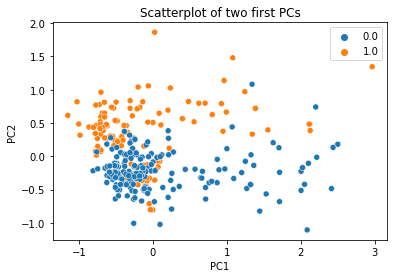

In [135]:
#print(x_train_val.shape)
#print(x_test.shape)
#print(y_train_val.shape)
#print(y_test.shape)

# %matplotlib qt

# scaler = StandardScaler()
# scaler.fit(eNose_raw) 
# X_scaled = scaler.transform(eNose_raw)

pca = PCA(n_components=3)
pca = pca.fit(eNose_raw)
x_trans = pca.transform(eNose_raw)
explained_variance = pca.explained_variance_
print(explained_variance)


sns.scatterplot(x=x_trans[:, 0], y=x_trans[:, 1], hue=data_labels) # Scatterplot of two first PCs
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of two first PCs')

# fig= plt.figure(0)
# ax = fig.add_subplot(111,  projection = '3d')

# x= x_trans[:, 0]
# y= x_trans[:, 1]
# z= x_trans[:, 2]

# cdict = {0:'blue',1:'orange'}
# labl = {0:'HC',1:'Post-Covid'}
# marker = {0:'o',1:'o'}
# alpha = {0:0.8, 1:0.8}

# # for l in np.unique(labels):
# #     ix = np.where(labels==1)
# #     ax.scatter(x[ix], y[ix], z[ix], c=cdict[l], s=40, alpha=alpha[l])

# for l in np.unique(data_labels):
#  ix= np.where(data_labels==l)
#  ax.scatter(x[ix], y[ix], z[ix], c=cdict[l], s=40,
#            label=labl[l], marker=marker[l], alpha=alpha[l])    

# ax.set_xlabel ("PC1")
# ax.set_ylabel ("PC2")
# ax.set_zlabel ("PC3")
# ax.legend()
# plt.show()

# fig= go.Figure()
# fig.add_trace(go.Scatter(
#     x_trans, x=x_trans[:, 0], y=x_trans[:, 1], z=x_trans[:, 2], mode='markers', marker_color = (data_labels), marker=dict(showscale=True)))
# fig.update_traces(marker_line_width=1, marker_size=3)


fig = px.scatter_3d(x_trans, x=x_trans[:, 0], y=x_trans[:, 1], z=x_trans[:, 2], color=(data_labels), opacity=0.75, color_continuous_scale=[(0, "LightSkyBlue"),(1, "orange") ])
fig.update_traces(marker=dict(size=5, line=dict(width=5, color = 'Black')))
fig.show()
